In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import shutil as shutil
pd.options.display.max_rows = 100
pd.options.display.max_columns = 100
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn import metrics
import os
import warnings
warnings.filterwarnings('ignore')

In [3]:
df=pd.read_csv("train.csv",encoding='utf-8',engine='python')

df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,NaN,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
#From the above 5 rows we uderstand that its a huge data set and there missing values . 
#so we need to further analyse the data and also apply missing value filters/or replace the missing values
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [5]:
def understanding_columns(ldf):
    str_cols=ldf.select_dtypes(include=['object']).columns
    first_values = ldf[str_cols].iloc[0]
    result = pd.DataFrame({'column': str_cols, 'first_value': first_values.values})
    return result
understanding_columns(df)

,column,first_value
0,MSZoning,RL
1,Street,Pave
2,Alley,NaN
3,LotShape,Reg
4,LandContour,Lvl
5,Utilities,AllPub
6,LotConfig,Inside
7,LandSlope,Gtl
8,Neighborhood,CollgCr
9,Condition1,Norm


In [6]:
missing_values = df.isnull().sum()
missing_percentage = (df.isnull().sum() / len(df)) * 100
missing_values_df = missing_values.to_frame(name='MissingCount')
missing_percentage = missing_percentage.to_frame(name = 'Missing_percentage')

missing_values_sorted = missing_values_df.sort_values(by='MissingCount', ascending=False)
print(missing_values_sorted)


               MissingCount
PoolQC                 1453
MiscFeature            1406
Alley                  1369
Fence                  1179
MasVnrType              872
FireplaceQu             690
LotFrontage             259
GarageQual               81
GarageFinish             81
GarageType               81
GarageYrBlt              81
GarageCond               81
BsmtFinType2             38
BsmtExposure             38
BsmtCond                 37
BsmtQual                 37
BsmtFinType1             37
MasVnrArea                8
Electrical                1
Condition2                0
BldgType                  0
Neighborhood              0
LandSlope                 0
LotConfig                 0
Condition1                0
LandContour               0
LotShape                  0
Street                    0
LotArea                   0
MSSubClass                0
MSZoning                  0
Id                        0
Utilities                 0
HouseStyle                0
Foundation          

In [7]:
missing_percentage_sorted = missing_percentage.sort_values(by = 'Missing_percentage', ascending=False)
print(missing_percentage_sorted.head(20))


              Missing_percentage
PoolQC                 99.520548
MiscFeature            96.301370
Alley                  93.767123
Fence                  80.753425
MasVnrType             59.726027
FireplaceQu            47.260274
LotFrontage            17.739726
GarageQual              5.547945
GarageFinish            5.547945
GarageType              5.547945
GarageYrBlt             5.547945
GarageCond              5.547945
BsmtFinType2            2.602740
BsmtExposure            2.602740
BsmtCond                2.534247
BsmtQual                2.534247
BsmtFinType1            2.534247
MasVnrArea              0.547945
Electrical              0.068493
Condition2              0.000000


Drop the fields having more than 50 percent mising missing values


In [8]:
df_clean = df.drop(columns=['PoolQC','MiscFeature','Alley','Fence','MasVnrType'])
df_clean.head()



,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,0,12,2008,WD,Normal,250000


In [9]:
def clean_dataframe(ldf):
    #fitering all string and object columns to perform basic cleaning like removing any whitespace, 
    # replacing wild characters, filling null with a specific string
    str_cols = ldf.select_dtypes(include=['object', 'string']).columns
    ldf[str_cols] = ( ldf[str_cols]
                                  .apply(lambda col: col.str.strip()) 
                                  .apply(lambda col: col.str.lower())
                                  .replace(r'[%+]', '', regex=True) 
                                  .fillna('unknown')
                    )
    #clean numeric columns, filling them with median
    num_cols = ldf.select_dtypes(include=['float','int64']).columns
    for col in num_cols:
        median_val = ldf[col].median()
        ldf[col] = ldf[col].fillna(median_val)

    return (ldf)
clean_dataframe(df_clean)
    

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,rl,65.0,8450,pave,reg,lvl,allpub,inside,gtl,collgcr,norm,norm,1fam,2story,7,5,2003,2003,gable,compshg,vinylsd,vinylsd,196.0,gd,ta,pconc,gd,ta,no,glq,706,unf,0,150,856,gasa,ex,y,sbrkr,856,854,0,1710,1,0,2,1,3,1,gd,8,typ,0,unknown,attchd,2003.0,rfn,2,548,ta,ta,y,0,61,0,0,0,0,0,2,2008,wd,normal,208500
1,2,20,rl,80.0,9600,pave,reg,lvl,allpub,fr2,gtl,veenker,feedr,norm,1fam,1story,6,8,1976,1976,gable,compshg,metalsd,metalsd,0.0,ta,ta,cblock,gd,ta,gd,alq,978,unf,0,284,1262,gasa,ex,y,sbrkr,1262,0,0,1262,0,1,2,0,3,1,ta,6,typ,1,ta,attchd,1976.0,rfn,2,460,ta,ta,y,298,0,0,0,0,0,0,5,2007,wd,normal,181500
2,3,60,rl,68.0,11250,pave,ir1,lvl,allpub,inside,gtl,collgcr,norm,norm,1fam,2story,7,5,2001,2002,gable,compshg,vinylsd,vinylsd,162.0,gd,ta,pconc,gd,ta,mn,glq,486,unf,0,434,920,gasa,ex,y,sbrkr,920,866,0,1786,1,0,2,1,3,1,gd,6,typ,1,ta,attchd,2001.0,rfn,2,608,ta,ta,y,0,42,0,0,0,0,0,9,2008,wd,normal,223500
3,4,70,rl,60.0,9550,pave,ir1,lvl,allpub,corner,gtl,crawfor,norm,norm,1fam,2story,7,5,1915,1970,gable,compshg,wd sdng,wd shng,0.0,ta,ta,brktil,ta,gd,no,alq,216,unf,0,540,756,gasa,gd,y,sbrkr,961,756,0,1717,1,0,1,0,3,1,gd,7,typ,1,gd,detchd,1998.0,unf,3,642,ta,ta,y,0,35,272,0,0,0,0,2,2006,wd,abnorml,140000
4,5,60,rl,84.0,14260,pave,ir1,lvl,allpub,fr2,gtl,noridge,norm,norm,1fam,2story,8,5,2000,2000,gable,compshg,vinylsd,vinylsd,350.0,gd,ta,pconc,gd,ta,av,glq,655,unf,0,490,1145,gasa,ex,y,sbrkr,1145,1053,0,2198,1,0,2,1,4,1,gd,9,typ,1,ta,attchd,2000.0,rfn,3,836,ta,ta,y,192,84,0,0,0,0,0,12,2008,wd,normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,rl,62.0,7917,pave,reg,lvl,allpub,inside,gtl,gilbert,norm,norm,1fam,2story,6,5,1999,2000,gable,compshg,vinylsd,vinylsd,0.0,ta,ta,pconc,gd,ta,no,unf,0,unf,0,953,953,gasa,ex,y,sbrkr,953,694,0,1647,0,0,2,1,3,1,ta,7,typ,1,ta,attchd,1999.0,rfn,2,460,ta,ta,y,0,40,0,0,0,0,0,8,2007,wd,normal,175000
1456,1457,20,rl,85.0,13175,pave,reg,lvl,allpub,inside,gtl,nwames,norm,norm,1fam,1story,6,6,1978,1988,gable,compshg,plywood,plywood,119.0,ta,ta,cblock,gd,ta,no,alq,790,rec,163,589,1542,gasa,ta,y,sbrkr,2073,0,0,2073,1,0,2,0,3,1,ta,7,min1,2,ta,attchd,1978.0,unf,2,500,ta,ta,y,349,0,0,0,0,0,0,2,2010,wd,normal,210000
1457,1458,70,rl,66.0,9042,pave,reg,lvl,allpub,inside,gtl,crawfor,norm,norm,1fam,2story,7,9,1941,2006,gable,compshg,cemntbd,cmentbd,0.0,ex,gd,stone,ta,gd,no,glq,275,unf,0,877,1152,gasa,ex,y,sbrkr,1188,1152,0,2340,0,0,2,0,4,1,gd,9,typ,2,gd,attchd,1941.0,rfn,1,252,ta,ta,y,0,60,0,0,0,0,2500,5,2010,wd,normal,266500
1458,1459,20,rl,68.0,9717,pave,reg,lvl,allpub,inside,gtl,names,norm,norm,1fam,1story,5,6,1950,1996,hip,compshg,metalsd,metalsd,0.0,ta,ta,cblock,ta,ta,mn,glq,49,rec,1029,0,1078,gasa,gd,y,fusea,1078,0,0,1078,1,0,1,0,2,1,gd,5,typ,0,unknown,attchd,1950.0,unf,1,240,ta,ta,y,366,0,112,0,0,0,0,4,2010,wd,normal,142125


In [10]:
#finally print the total null values in the dataframe, if its less than 10% then we are good to do EDA
#and also drop the id column as it will not be relvant further for the analysis

In [11]:
print(df_clean.isnull().mean().sort_values(ascending=False) *100)
df_clean = df_clean.drop(['Id'], axis=1)
df_clean.head()

Id               0.0
MSSubClass       0.0
MSZoning         0.0
LotFrontage      0.0
LotArea          0.0
Street           0.0
LotShape         0.0
LandContour      0.0
Utilities        0.0
LotConfig        0.0
LandSlope        0.0
Neighborhood     0.0
Condition1       0.0
Condition2       0.0
BldgType         0.0
HouseStyle       0.0
OverallQual      0.0
OverallCond      0.0
YearBuilt        0.0
YearRemodAdd     0.0
RoofStyle        0.0
RoofMatl         0.0
Exterior1st      0.0
Exterior2nd      0.0
MasVnrArea       0.0
ExterQual        0.0
ExterCond        0.0
Foundation       0.0
BsmtQual         0.0
BsmtCond         0.0
BsmtExposure     0.0
BsmtFinType1     0.0
BsmtFinSF1       0.0
BsmtFinType2     0.0
BsmtFinSF2       0.0
BsmtUnfSF        0.0
TotalBsmtSF      0.0
Heating          0.0
HeatingQC        0.0
CentralAir       0.0
Electrical       0.0
1stFlrSF         0.0
2ndFlrSF         0.0
LowQualFinSF     0.0
GrLivArea        0.0
BsmtFullBath     0.0
BsmtHalfBath     0.0
FullBath     

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,rl,65.0,8450,pave,reg,lvl,allpub,inside,gtl,collgcr,norm,norm,1fam,2story,7,5,2003,2003,gable,compshg,vinylsd,vinylsd,196.0,gd,ta,pconc,gd,ta,no,glq,706,unf,0,150,856,gasa,ex,y,sbrkr,856,854,0,1710,1,0,2,1,3,1,gd,8,typ,0,unknown,attchd,2003.0,rfn,2,548,ta,ta,y,0,61,0,0,0,0,0,2,2008,wd,normal,208500
1,20,rl,80.0,9600,pave,reg,lvl,allpub,fr2,gtl,veenker,feedr,norm,1fam,1story,6,8,1976,1976,gable,compshg,metalsd,metalsd,0.0,ta,ta,cblock,gd,ta,gd,alq,978,unf,0,284,1262,gasa,ex,y,sbrkr,1262,0,0,1262,0,1,2,0,3,1,ta,6,typ,1,ta,attchd,1976.0,rfn,2,460,ta,ta,y,298,0,0,0,0,0,0,5,2007,wd,normal,181500
2,60,rl,68.0,11250,pave,ir1,lvl,allpub,inside,gtl,collgcr,norm,norm,1fam,2story,7,5,2001,2002,gable,compshg,vinylsd,vinylsd,162.0,gd,ta,pconc,gd,ta,mn,glq,486,unf,0,434,920,gasa,ex,y,sbrkr,920,866,0,1786,1,0,2,1,3,1,gd,6,typ,1,ta,attchd,2001.0,rfn,2,608,ta,ta,y,0,42,0,0,0,0,0,9,2008,wd,normal,223500
3,70,rl,60.0,9550,pave,ir1,lvl,allpub,corner,gtl,crawfor,norm,norm,1fam,2story,7,5,1915,1970,gable,compshg,wd sdng,wd shng,0.0,ta,ta,brktil,ta,gd,no,alq,216,unf,0,540,756,gasa,gd,y,sbrkr,961,756,0,1717,1,0,1,0,3,1,gd,7,typ,1,gd,detchd,1998.0,unf,3,642,ta,ta,y,0,35,272,0,0,0,0,2,2006,wd,abnorml,140000
4,60,rl,84.0,14260,pave,ir1,lvl,allpub,fr2,gtl,noridge,norm,norm,1fam,2story,8,5,2000,2000,gable,compshg,vinylsd,vinylsd,350.0,gd,ta,pconc,gd,ta,av,glq,655,unf,0,490,1145,gasa,ex,y,sbrkr,1145,1053,0,2198,1,0,2,1,4,1,gd,9,typ,1,ta,attchd,2000.0,rfn,3,836,ta,ta,y,192,84,0,0,0,0,0,12,2008,wd,normal,250000


In [12]:
#Checking for outlier by describing it and exploring in numerical columns 
df_clean.describe(percentiles=[.25,.5,.75,.90,.95,.99])
df_clean.describe

<bound method NDFrame.describe of       MSSubClass MSZoning  LotFrontage  LotArea Street LotShape LandContour  \
0             60       rl         65.0     8450   pave      reg         lvl   
1             20       rl         80.0     9600   pave      reg         lvl   
2             60       rl         68.0    11250   pave      ir1         lvl   
3             70       rl         60.0     9550   pave      ir1         lvl   
4             60       rl         84.0    14260   pave      ir1         lvl   
...          ...      ...          ...      ...    ...      ...         ...   
1455          60       rl         62.0     7917   pave      reg         lvl   
1456          20       rl         85.0    13175   pave      reg         lvl   
1457          70       rl         66.0     9042   pave      reg         lvl   
1458          20       rl         68.0     9717   pave      reg         lvl   
1459          20       rl         75.0     9937   pave      reg         lvl   

     Utilities Lo

#Univariate analysism

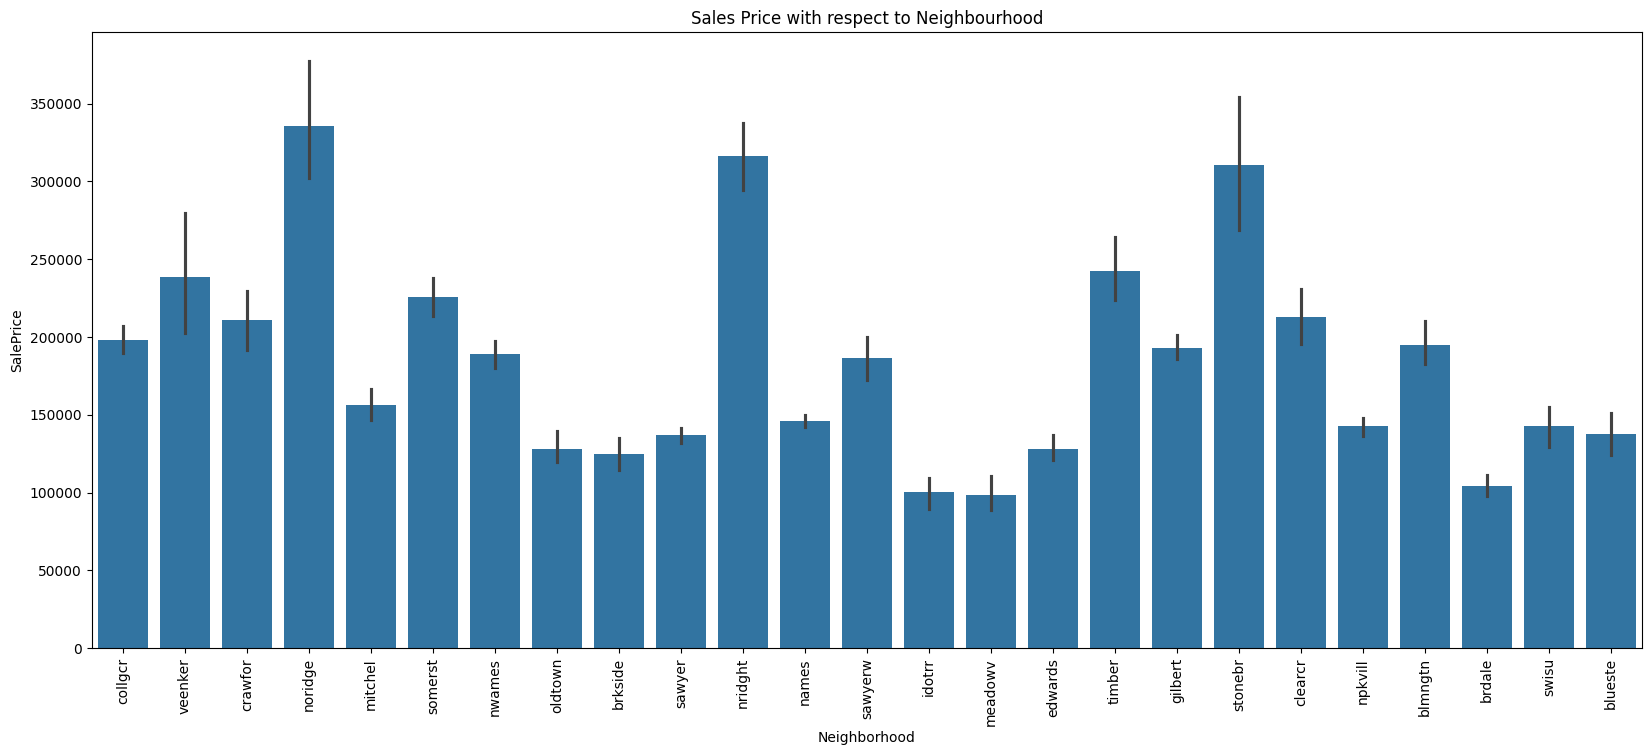

In [13]:
# plot 'Sale Price' with respect to 'Neighborhood'

plt.figure(figsize=(20, 8))
sns.barplot(x="Neighborhood", y="SalePrice", data= df_clean)
plt.title("Sales Price with respect to Neighbourhood")
plt.xticks(rotation=90)
plt.show()

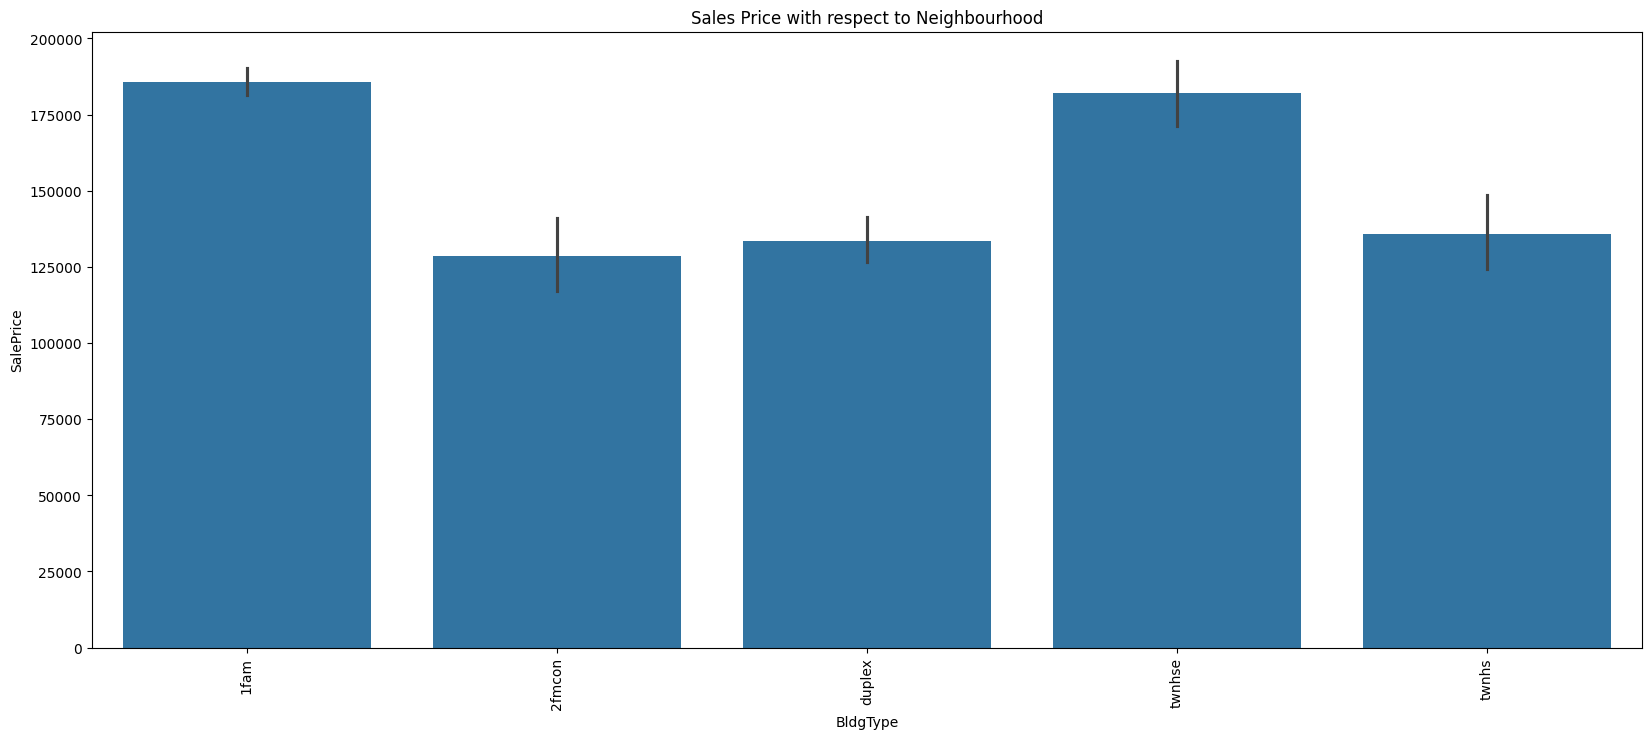

In [14]:
# plot 'Sale Price' with respect to Building type'

plt.figure(figsize=(20, 8))
sns.barplot(x="BldgType", y="SalePrice", data= df_clean)
plt.title("Sales Price with respect to Neighbourhood")
plt.xticks(rotation=90)
plt.show()

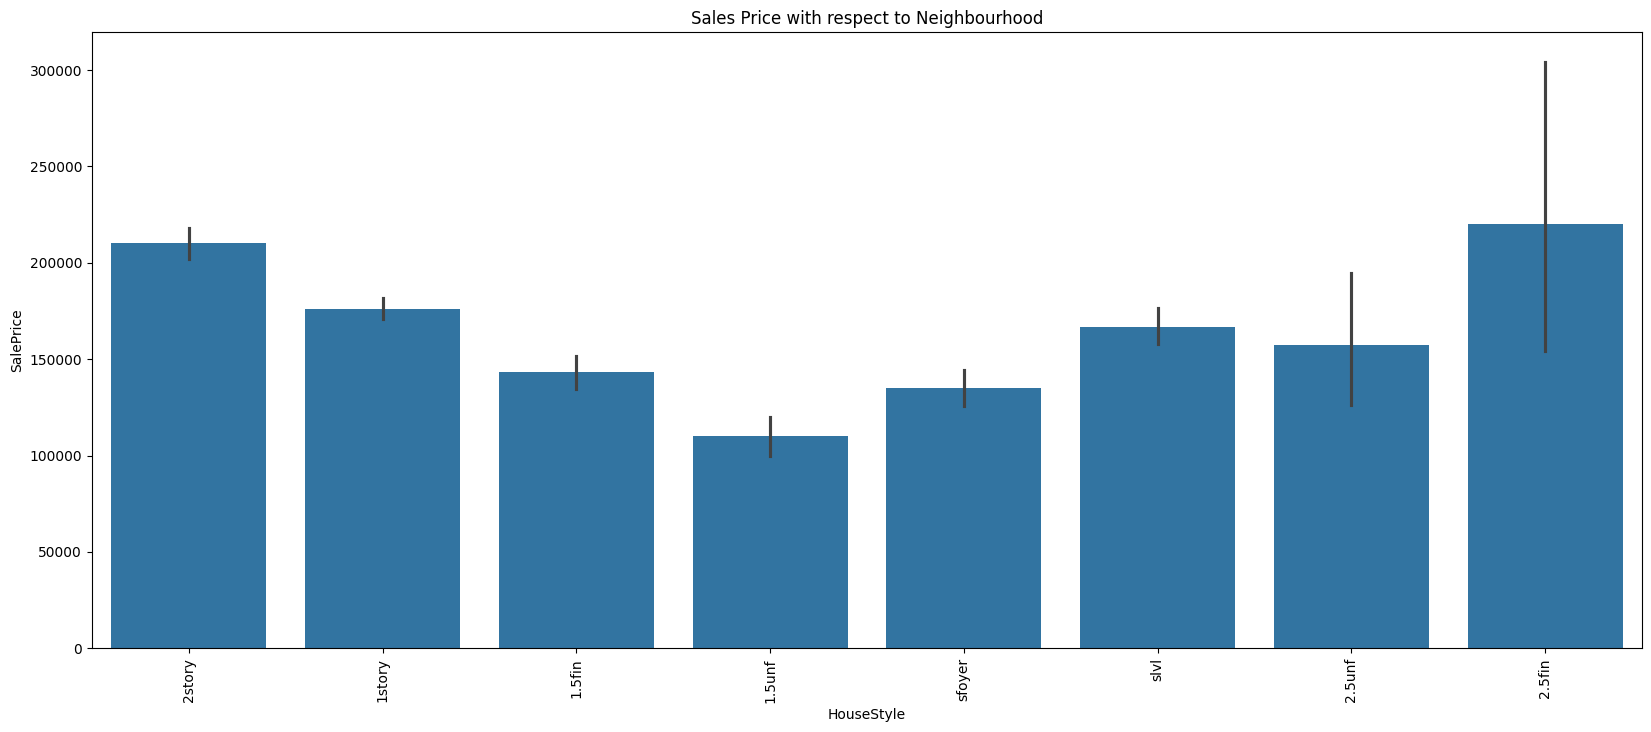

In [15]:
# plot 'Sale Price' with respect to Building type'

plt.figure(figsize=(20, 8))
sns.barplot(x="HouseStyle", y="SalePrice", data= df_clean)
plt.title("Sales Price with respect to Neighbourhood")
plt.xticks(rotation=90)
plt.show()

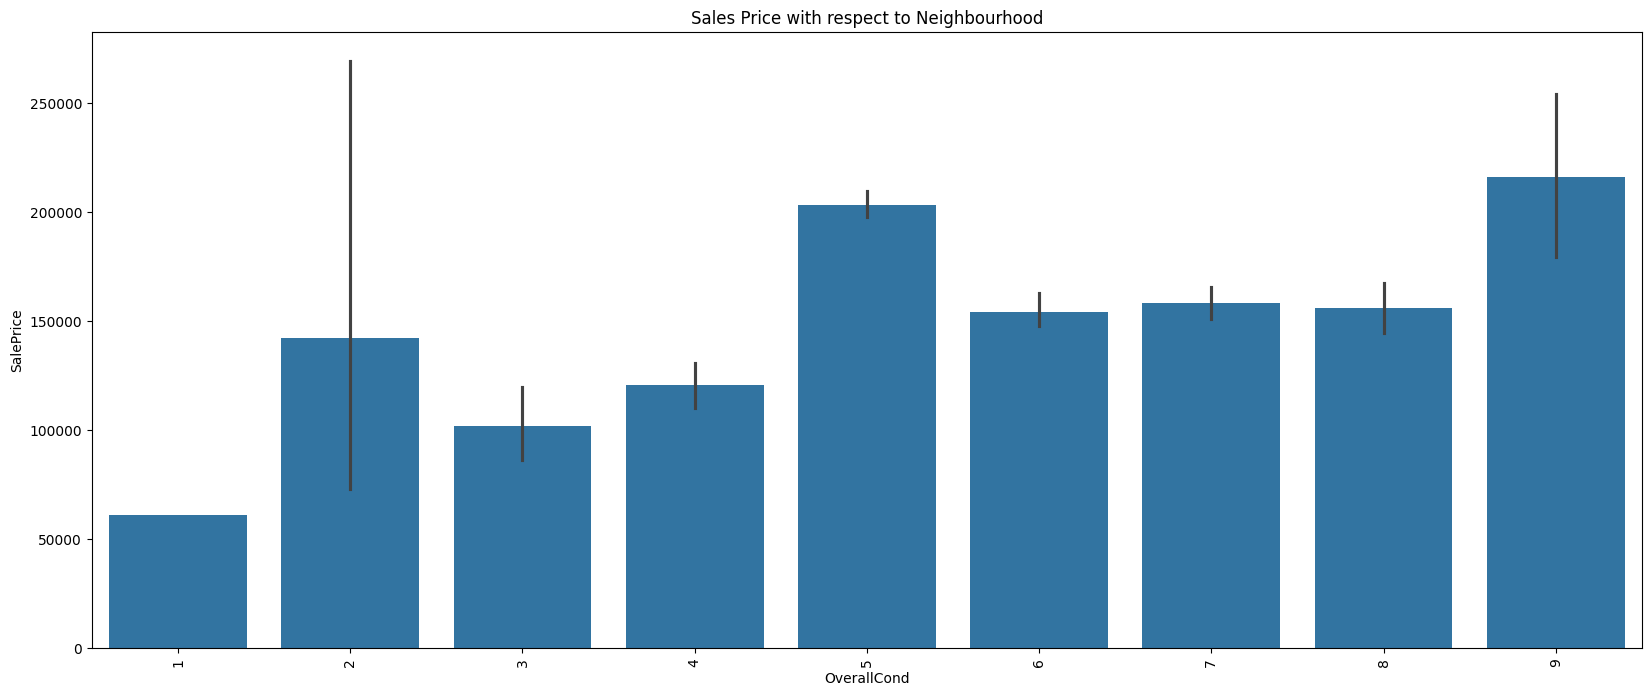

In [16]:
plt.figure(figsize=(20, 8))
sns.barplot(x="OverallCond", y="SalePrice", data= df_clean)
plt.title("Sales Price with respect to Neighbourhood")
plt.xticks(rotation=90)
plt.show()

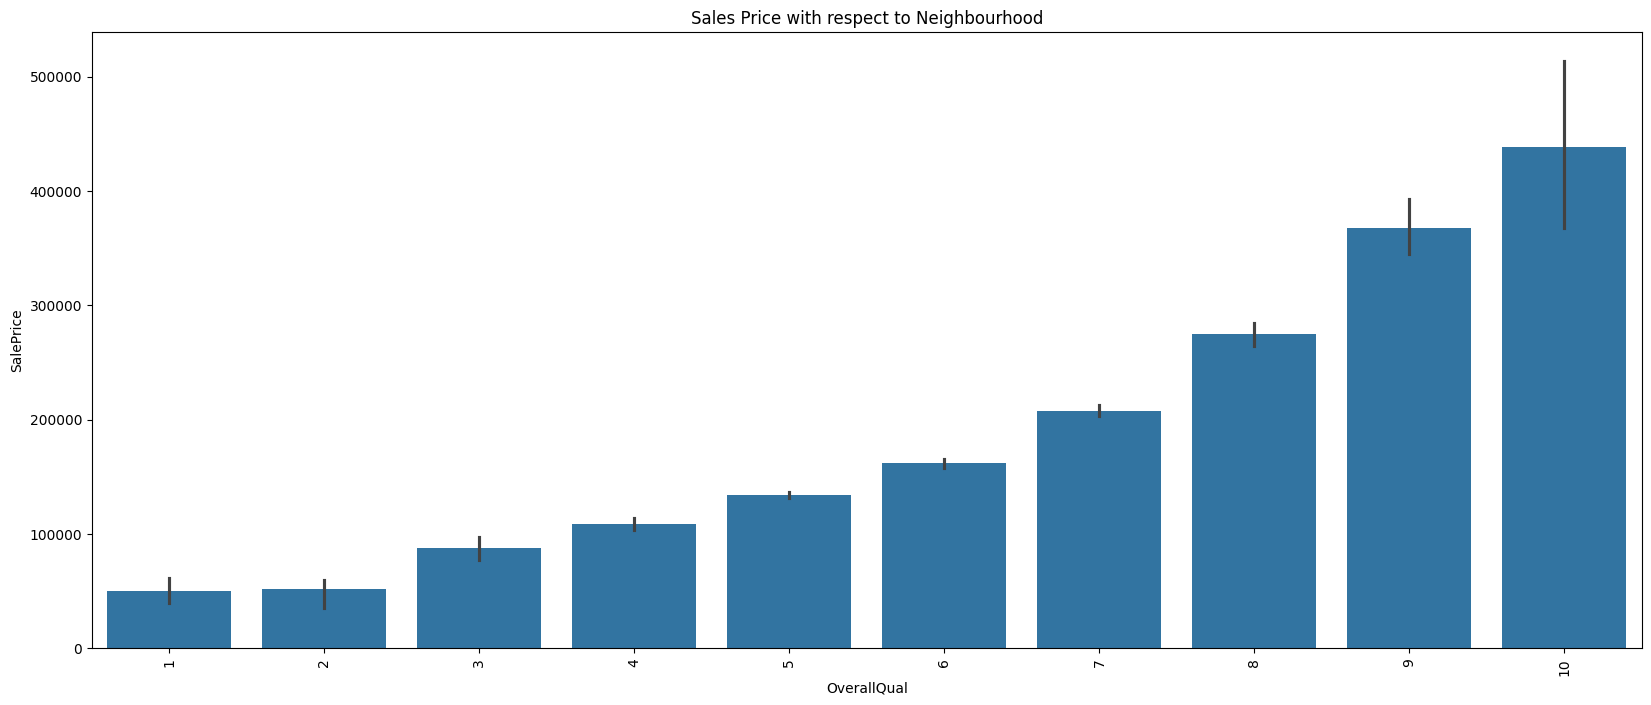

In [17]:
# plot 'Sale Price' with respect to Building type'

plt.figure(figsize=(20, 8))
sns.barplot(x="OverallQual", y="SalePrice", data= df_clean)
plt.title("Sales Price with respect to Neighbourhood")
plt.xticks(rotation=90)
plt.show()

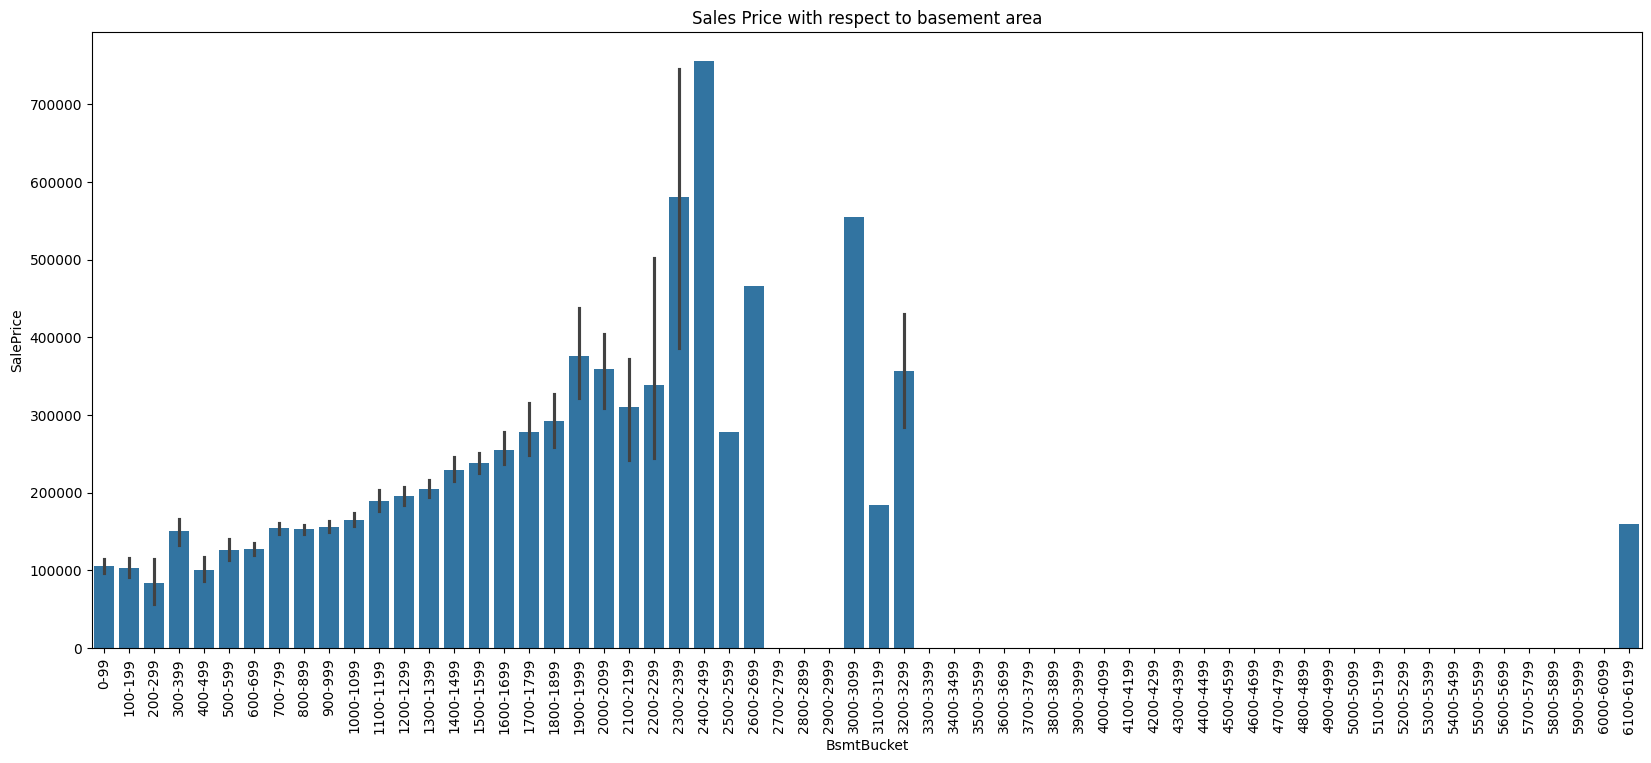

In [18]:
# Create 10-year buckets for Basement area
ldf = df_clean

ldf['BsmtBucket'] = pd.cut(ldf['TotalBsmtSF'],
                           bins=range(ldf['TotalBsmtSF'].min(), ldf['TotalBsmtSF'].max() + 100, 100),
                           labels=[f"{i}-{i+99}" for i in range(ldf['TotalBsmtSF'].min(), ldf['TotalBsmtSF'].max(), 100)],
                           right=False)


plt.figure(figsize=(20, 8))
sns.barplot(x="BsmtBucket", y="SalePrice", data= ldf)
plt.title("Sales Price with respect to basement area")
plt.xticks(rotation=90)
plt.show()

In [19]:
df_clean['TotalBsmtSF']

0        856
1       1262
2        920
3        756
4       1145
        ... 
1455     953
1456    1542
1457    1152
1458    1078
1459    1256
Name: TotalBsmtSF, Length: 1460, dtype: int64

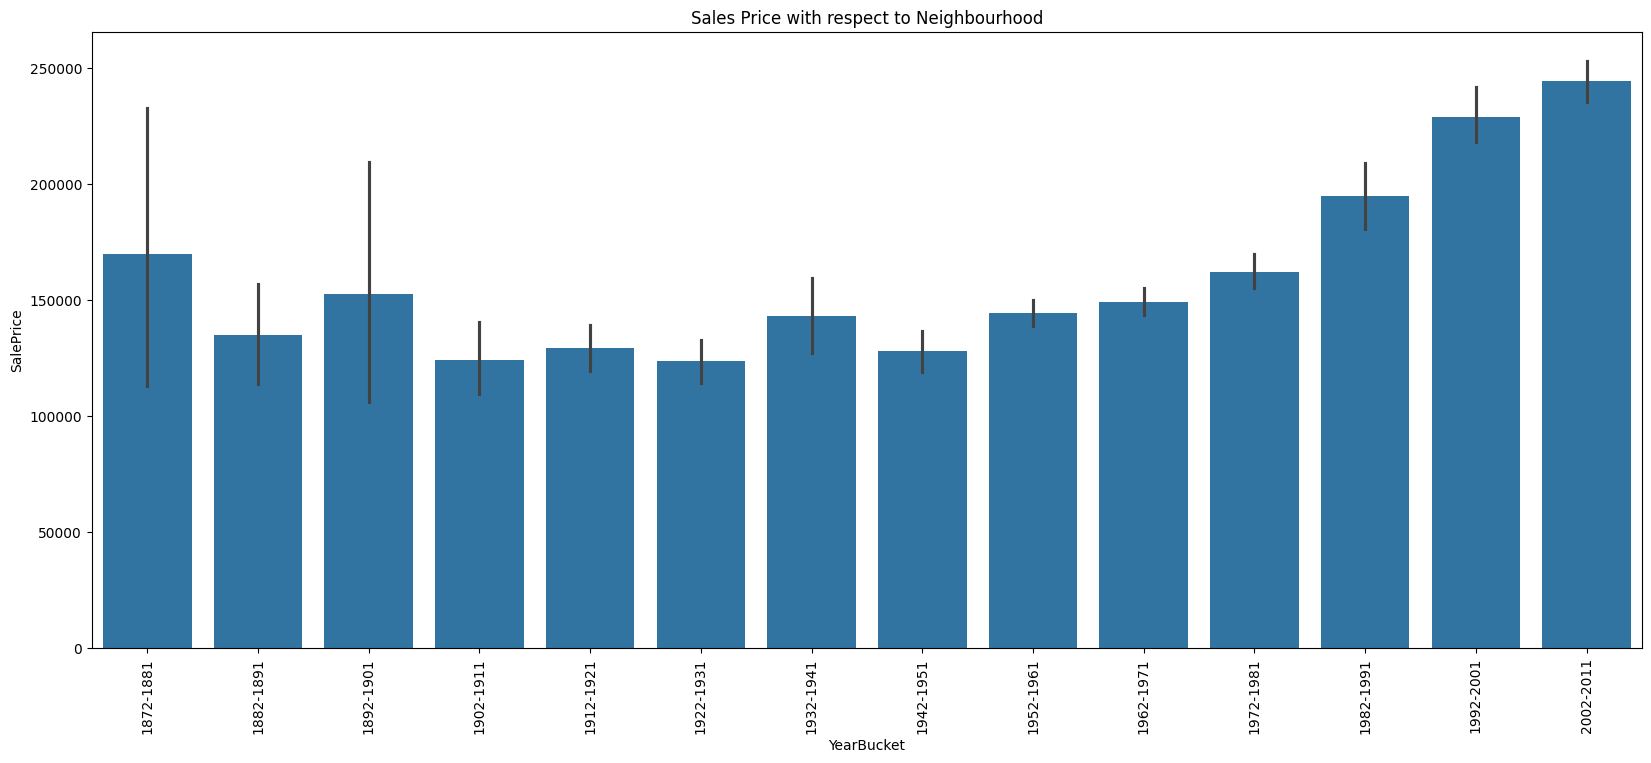

In [20]:
# plot 'Sale Price' with respect to Building type'

# Create 10-year buckets for YearBuilt
ldf = df_clean
ldf['YearBucket'] = pd.cut(ldf['YearBuilt'], 
                                bins=range(ldf['YearBuilt'].min(), ldf['YearBuilt'].max() + 10, 10),
                                labels=[f"{i}-{i+9}" for i in range(df_clean['YearBuilt'].min(), ldf['YearBuilt'].max(), 10)],
                                right=False)

plt.figure(figsize=(20, 8))
sns.barplot(x="YearBucket", y="SalePrice",  data= ldf)
plt.title("Sales Price with respect to Neighbourhood")
plt.xticks(rotation=90)
plt.show()

#Bivariate analysis

In [21]:
#type of each feature in data: int, float, object
types = df_clean.dtypes
#numerical values are either type int or float
numeric_type = types[(types == 'int64') | (types == float)] 
#categorical values are type object
categorical_type = types[types == object]
categorical_columns = list(categorical_type.index)
print(categorical_columns)


['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition']


In [22]:
pd.DataFrame(types).reset_index().set_index(0).reset_index()[0].value_counts()

0
object      38
int64       34
float64      3
category     1
category     1
Name: count, dtype: int64

In [23]:
#one-hot encode select categorical columns and drop the first column
df_clean= pd.get_dummies(df_clean, drop_first=True )
# Convert all int64 columns to float
df_clean[df_clean.select_dtypes(include=['int64']).columns] = df_clean.select_dtypes(include=['int64']).astype(float)

In [24]:
df_clean.info

<bound method DataFrame.info of       MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  \
0           60.0         65.0   8450.0          7.0          5.0     2003.0   
1           20.0         80.0   9600.0          6.0          8.0     1976.0   
2           60.0         68.0  11250.0          7.0          5.0     2001.0   
3           70.0         60.0   9550.0          7.0          5.0     1915.0   
4           60.0         84.0  14260.0          8.0          5.0     2000.0   
...          ...          ...      ...          ...          ...        ...   
1455        60.0         62.0   7917.0          6.0          5.0     1999.0   
1456        20.0         85.0  13175.0          6.0          6.0     1978.0   
1457        70.0         66.0   9042.0          7.0          9.0     1941.0   
1458        20.0         68.0   9717.0          5.0          6.0     1950.0   
1459        20.0         75.0   9937.0          5.0          6.0     1965.0   

      YearRemodAdd 

In [25]:

corr = df_clean.corr(numeric_only=True)['SalePrice'].abs()
low_corr_features = corr[corr < 0.05].index.tolist()

print('Low correlation features to drop',low_corr_features)


Low correlation features to drop ['BsmtFinSF2', 'LowQualFinSF', 'BsmtHalfBath', '3SsnPorch', 'MiscVal', 'MoSold', 'YrSold', 'Street_pave', 'LotShape_ir3', 'LandContour_low', 'LandContour_lvl', 'Utilities_nosewa', 'LotConfig_fr2', 'LotConfig_fr3', 'LandSlope_mod', 'LandSlope_sev', 'Neighborhood_blueste', 'Neighborhood_gilbert', 'Neighborhood_npkvill', 'Neighborhood_nwames', 'Neighborhood_sawyerw', 'Condition1_posa', 'Condition1_posn', 'Condition1_rrae', 'Condition1_rran', 'Condition1_rrne', 'Condition1_rrnn', 'Condition2_feedr', 'Condition2_norm', 'Condition2_posa', 'Condition2_posn', 'Condition2_rrae', 'Condition2_rran', 'Condition2_rrnn', 'BldgType_twnhse', 'HouseStyle_2.5fin', 'HouseStyle_2.5unf', 'HouseStyle_slvl', 'RoofStyle_gambrel', 'RoofStyle_mansard', 'RoofStyle_shed', 'RoofMatl_membran', 'RoofMatl_metal', 'RoofMatl_roll', 'RoofMatl_tar&grv', 'RoofMatl_wdshake', 'Exterior1st_asphshn', 'Exterior1st_brkface', 'Exterior1st_cblock', 'Exterior1st_imstucc', 'Exterior1st_plywood', 'Ex

In [26]:
df_clean = df_clean.drop(columns=low_corr_features)

In [27]:
#Detect multicollinearity (>0.8)


corr_matrix = df_clean.corr(numeric_only=True).abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

high_corr_pairs = [
    (col, row, upper.loc[row, col])
    for col in upper.columns
    for row in upper.index
    if upper.loc[row, col] > 0.80
]

print("Highly correlated pairs:")
for a, b, c in high_corr_pairs:
    print(f"{a} ↔ {b} : corr = {c:.2f}")







Highly correlated pairs:
1stFlrSF ↔ TotalBsmtSF : corr = 0.82
TotRmsAbvGrd ↔ GrLivArea : corr = 0.83
GarageArea ↔ GarageCars : corr = 0.88
MSZoning_rm ↔ MSZoning_rl : corr = 0.81
Neighborhood_somerst ↔ MSZoning_fv : corr = 0.86
HouseStyle_2story ↔ 2ndFlrSF : corr = 0.81
RoofStyle_hip ↔ RoofStyle_gable : corr = 0.93
Exterior2nd_cmentbd ↔ Exterior1st_cemntbd : corr = 0.97
Exterior2nd_hdboard ↔ Exterior1st_hdboard : corr = 0.88
Exterior2nd_metalsd ↔ Exterior1st_metalsd : corr = 0.97
Exterior2nd_vinylsd ↔ Exterior1st_vinylsd : corr = 0.98
Exterior2nd_wd sdng ↔ Exterior1st_wd sdng : corr = 0.86
ExterQual_ta ↔ ExterQual_gd : corr = 0.91
ExterCond_ta ↔ ExterCond_gd : corr = 0.89
BsmtQual_unknown ↔ Foundation_slab : corr = 0.80
BsmtCond_unknown ↔ Foundation_slab : corr = 0.80
BsmtCond_unknown ↔ BsmtQual_unknown : corr = 1.00
BsmtExposure_unknown ↔ BsmtQual_unknown : corr = 0.99
BsmtExposure_unknown ↔ BsmtCond_unknown : corr = 0.99
BsmtFinType1_unknown ↔ Foundation_slab : corr = 0.80
BsmtFinTyp

In [28]:

# Keep only (A,B) from (A,B,corr)
pairs_2 = [(a, b) for (a, b, *_) in high_corr_pairs]  # works for 3+ elements too

drop_cols = sorted(set([b for (_, b) in pairs_2 if b in df_clean.columns]))
df_reduced = df_clean.drop(columns=drop_cols, errors='ignore')



In [29]:

print(f"Dropped {len(drop_cols)} columns due to multicollinearity.")
print(drop_cols)
print(df_reduced.info)


Dropped 25 columns due to multicollinearity.
['2ndFlrSF', 'BsmtCond_unknown', 'BsmtExposure_unknown', 'BsmtFinType1_unknown', 'BsmtQual_unknown', 'ExterCond_gd', 'ExterQual_gd', 'Exterior1st_cemntbd', 'Exterior1st_hdboard', 'Exterior1st_metalsd', 'Exterior1st_vinylsd', 'Exterior1st_wd sdng', 'Fireplaces', 'Foundation_slab', 'GarageCars', 'GarageFinish_unknown', 'GarageQual_unknown', 'GarageType_unknown', 'GrLivArea', 'KitchenQual_gd', 'MSZoning_fv', 'MSZoning_rl', 'RoofStyle_gable', 'SaleType_new', 'TotalBsmtSF']
<bound method DataFrame.info of       MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  \
0           60.0         65.0   8450.0          7.0          5.0     2003.0   
1           20.0         80.0   9600.0          6.0          8.0     1976.0   
2           60.0         68.0  11250.0          7.0          5.0     2001.0   
3           70.0         60.0   9550.0          7.0          5.0     1915.0   
4           60.0         84.0  14260.0          8.0   


### Why this Feature Selection Technique?

To build a predictive yet stable house‑price model, we apply a two‑stage feature selection approach:

1) **Target relevance filtering (Top‑K):**  
   We rank features by their association with the target (`SalePrice`) using **|Spearman correlation|** (robust to monotonic non‑linear relationships and to skewed distributions common in housing data). Optionally, we blend this with **Mutual Information (MI)** to capture non‑linear signals that correlation can miss. We then **keep the Top‑K highest‑scoring features** (e.g., K=50).  
   *Rationale:* After one‑hot encoding, the dataset can explode into hundreds of columns. Many of those columns are weak or noisy predictors. Selecting Top‑K concentrates modeling capacity on the strongest signals, improving generalization and training speed while reducing overfitting risk.

2) **Multicollinearity pruning (within the selected set):**  
   Among the Top‑K, we remove pairs of features that are **highly correlated with each other** (e.g., |r| > 0.85), **keeping the one more strongly associated with the target**.  
   *Rationale:* Highly collinear features duplicate information, inflate variance of coefficient estimates (for linear models), and can make feature attributions unstable. Pruning redundant features improves model interpretability and numerical stability without sacrificing signal.

**Benefits of this approach**
- **Better generalization:** Focuses on features with actual predictive power; reduces noise and variance.  
- **Model stability:** Limits multicollinearity so estimates and importances are more reliable.  
- **Practical efficiency:** Smaller, cleaner feature sets train faster and simplify hyperparameter tuning.  
- **Interpretability:** Retains meaningful predictors while avoiding duplicate size/area proxies (e.g., `GarageCars` vs `GarageArea`).

**Why Spearman (and optionally MI)?**  
- **Spearman** captures monotonic relationships and is less sensitive to outliers/scale—useful with skewed real‑estate metrics (e.g., area, price).  
- **Mutual Information** complements correlation by detecting **non‑linear** associations, improving ranking when relationships aren’t strictly linear.

**In short:**  
> We first pick the strongest features for `SalePrice` (Top‑K by association), then remove duplicates in meaning (highly inter‑correlated features), keeping the version that best predicts the target. This yields a compact, stable, and performant feature set.
``


In [30]:



def select_topk_by_spearman(df: pd.DataFrame, target: str = 'SalePrice', k: int = 50):
    assert target in df.columns, f"Target '{target}' not found"
    # Keep numeric columns only for correlation
    num_df = df.select_dtypes(include='number').copy()
    # Ensure target is numeric
    num_df[target] = pd.to_numeric(num_df[target], errors='coerce')
    # Compute |Spearman| correlation with target
    corr = num_df.corr(method='spearman', numeric_only=True)[target].drop(labels=[target], errors='ignore').abs()
    # Get top-k features
    topk = corr.sort_values(ascending=False).head(k).index.tolist()
    X_topk = df[topk]  # features only
    return X_topk, topk, corr

# ---- Usage
# If you still have categoricals, one-hot encode them first (example):
# df_enc = pd.get_dummies(df, drop_first=True)
# Then:
X_top50, top50_list, corr_series = select_topk_by_spearman(df, target='SalePrice', k=50)
print(f"Selected Top-50 features:\n{top50_list}")


Selected Top-50 features:
['OverallQual', 'GrLivArea', 'GarageCars', 'YearBuilt', 'GarageArea', 'FullBath', 'TotalBsmtSF', 'GarageYrBlt', '1stFlrSF', 'YearRemodAdd', 'TotRmsAbvGrd', 'Fireplaces', 'OpenPorchSF', 'LotArea', 'MasVnrArea', 'LotFrontage', 'WoodDeckSF', 'HalfBath', 'BsmtFinSF1', '2ndFlrSF', 'BedroomAbvGr', 'BsmtFullBath', 'EnclosedPorch', 'BsmtUnfSF', 'KitchenAbvGr', 'OverallCond', 'ScreenPorch', 'MoSold', 'LowQualFinSF', '3SsnPorch', 'MiscVal', 'PoolArea', 'BsmtFinSF2', 'YrSold', 'Id', 'BsmtHalfBath', 'MSSubClass']


In [31]:

# Ensure only the columns that exist in df_reduced are selected
top50_numeric = [col for col in top50_list if col in df_reduced.columns]

# Create the final filtered dataframe
df_top50_numeric_selected = df_reduced[top50_numeric].copy()

print(f"Selected {len(top50_numeric)} columns out of top50_list.")
df_top50_numeric_selected.head()


Selected 24 columns out of top50_list.


,OverallQual,YearBuilt,GarageArea,FullBath,GarageYrBlt,1stFlrSF,YearRemodAdd,TotRmsAbvGrd,OpenPorchSF,LotArea,MasVnrArea,LotFrontage,WoodDeckSF,HalfBath,BsmtFinSF1,BedroomAbvGr,BsmtFullBath,EnclosedPorch,BsmtUnfSF,KitchenAbvGr,OverallCond,ScreenPorch,PoolArea,MSSubClass
0,7.0,2003.0,548.0,2.0,2003.0,856.0,2003.0,8.0,61.0,8450.0,196.0,65.0,0.0,1.0,706.0,3.0,1.0,0.0,150.0,1.0,5.0,0.0,0.0,60.0
1,6.0,1976.0,460.0,2.0,1976.0,1262.0,1976.0,6.0,0.0,9600.0,0.0,80.0,298.0,0.0,978.0,3.0,0.0,0.0,284.0,1.0,8.0,0.0,0.0,20.0
2,7.0,2001.0,608.0,2.0,2001.0,920.0,2002.0,6.0,42.0,11250.0,162.0,68.0,0.0,1.0,486.0,3.0,1.0,0.0,434.0,1.0,5.0,0.0,0.0,60.0
3,7.0,1915.0,642.0,1.0,1998.0,961.0,1970.0,7.0,35.0,9550.0,0.0,60.0,0.0,0.0,216.0,3.0,1.0,272.0,540.0,1.0,5.0,0.0,0.0,70.0
4,8.0,2000.0,836.0,2.0,2000.0,1145.0,2000.0,9.0,84.0,14260.0,350.0,84.0,192.0,1.0,655.0,4.0,1.0,0.0,490.0,1.0,5.0,0.0,0.0,60.0


WE have now
cleaned data
removed multicollinearity
selected the Top‑50 predictive features
Now the next logical EDA / preprocessing step is Outlier Detection, but with important rules.
Because:

Outliers distort Linear Regression strongly
They inflate residuals
They break homoscedasticity
They can bias the coefficients
They reduce model accuracy and stability

Also Notice we have not considered the boolean fields ,as
Boolean columns have very low variance
A boolean variable has only two values: 0 and 1.
If one of the categories dominates (e.g., 95% zeros, 5% ones), then:

correlation with SalePrice becomes very small
mutual information also becomes small
they appear as “weak predictors”

However we will still go ahead and do a sanity check on the boolean features to see if some important predictor is required as per the domain know how

In [32]:
#You can print correlation + mutual information for only boolean columns:
bool_cols = [c for c in df_reduced.columns if df_reduced[c].dropna().isin([0,1]).all()]

# Spearman correlation with SalePrice
corr_bool = df_reduced[bool_cols].corrwith(df_reduced['SalePrice'], method='spearman').abs().sort_values(ascending=False)

# Mutual Information
from sklearn.feature_selection import mutual_info_regression
import numpy as np

mi_bool = pd.Series(
    mutual_info_regression(df_reduced[bool_cols].fillna(0), df_reduced['SalePrice']),
    index=bool_cols
).sort_values(ascending=False)

print("Top Boolean Correlations:\n", corr_bool.head(10))
print("\nTop Boolean MI:\n", mi_bool.head(10))


Top Boolean Correlations:
 ExterQual_ta            0.637785
KitchenQual_ta          0.581803
Foundation_pconc        0.562287
FireplaceQu_unknown     0.525735
BsmtQual_ta             0.522456
GarageFinish_unf        0.489460
YearBucket_2002-2011    0.477338
GarageType_attchd       0.455399
BsmtFinType1_glq        0.448915
GarageType_detchd       0.440294
dtype: float64

Top Boolean MI:
 ExterQual_ta            0.251544
KitchenQual_ta          0.223774
Foundation_pconc        0.185834
BsmtQual_ta             0.176951
FireplaceQu_unknown     0.172365
YearBucket_2002-2011    0.160232
BsmtQual_gd             0.148427
GarageFinish_unf        0.136273
GarageType_attchd       0.130152
BsmtFinType1_glq        0.109213
dtype: float64


correlation above 0.4 with SalePrice is excellent, and above 0.5 is highly predictive.
Dummy/Boolean                                      FeatureWhat It MeansWhy          It’s Important
ExterQual_ta (0.63)                                 TA-quality exterior             VERY strong impact on pricemes dataset)
KitchenQual_ta (0.58)                               Typical/Average 
kitchenKitchen quality = huge price driverFoundation_pconc (0.56)Poured concrete foundationHouses with PConc foundations are typically newer, higher qualityFireplaceQu_unknown (0.52)Missing fireplace qualitySurprisingly predictive — often correlated with no fireplaceBsmtQual_ta (0.52)Typical basement qualityBasement quality directly impacts valueGarageFinish_unf (0.48)Unfinished garage interiorGarage finish correlates with home qualityYearBucket_2002–2011 (0.47)Homes built 2002–2011Newer homes → higher sale priceGarageType_attchd (0.45)Attached garageAdds convenience/valueBsmtFinType1_glq (0.45)Good quality finished basementHigh price impactGarageType_detchd (0.44)Detached garageDifferent tier, still predictive

In [42]:

important_booleans = [
    'ExterQual_ta',
    'KitchenQual_ta',
    'Foundation_pconc',
    'GarageType_attchd',
    'SalePrice'    
]
selected = top50_numeric + important_booleans
print(selected)
df_final = df_reduced[selected].copy()
df_final.head

['OverallQual', 'YearBuilt', 'GarageArea', 'FullBath', 'GarageYrBlt', '1stFlrSF', 'YearRemodAdd', 'TotRmsAbvGrd', 'OpenPorchSF', 'LotArea', 'MasVnrArea', 'LotFrontage', 'WoodDeckSF', 'HalfBath', 'BsmtFinSF1', 'BedroomAbvGr', 'BsmtFullBath', 'EnclosedPorch', 'BsmtUnfSF', 'KitchenAbvGr', 'OverallCond', 'ScreenPorch', 'PoolArea', 'MSSubClass', 'ExterQual_ta', 'KitchenQual_ta', 'Foundation_pconc', 'GarageType_attchd', 'SalePrice']


<bound method NDFrame.head of       OverallQual  YearBuilt  GarageArea  FullBath  GarageYrBlt  1stFlrSF  \
0             7.0     2003.0       548.0       2.0       2003.0     856.0   
1             6.0     1976.0       460.0       2.0       1976.0    1262.0   
2             7.0     2001.0       608.0       2.0       2001.0     920.0   
3             7.0     1915.0       642.0       1.0       1998.0     961.0   
4             8.0     2000.0       836.0       2.0       2000.0    1145.0   
...           ...        ...         ...       ...          ...       ...   
1455          6.0     1999.0       460.0       2.0       1999.0     953.0   
1456          6.0     1978.0       500.0       2.0       1978.0    2073.0   
1457          7.0     1941.0       252.0       2.0       1941.0    1188.0   
1458          5.0     1950.0       240.0       1.0       1950.0    1078.0   
1459          5.0     1965.0       276.0       1.0       1965.0    1256.0   

      YearRemodAdd  TotRmsAbvGrd  OpenPorchSF

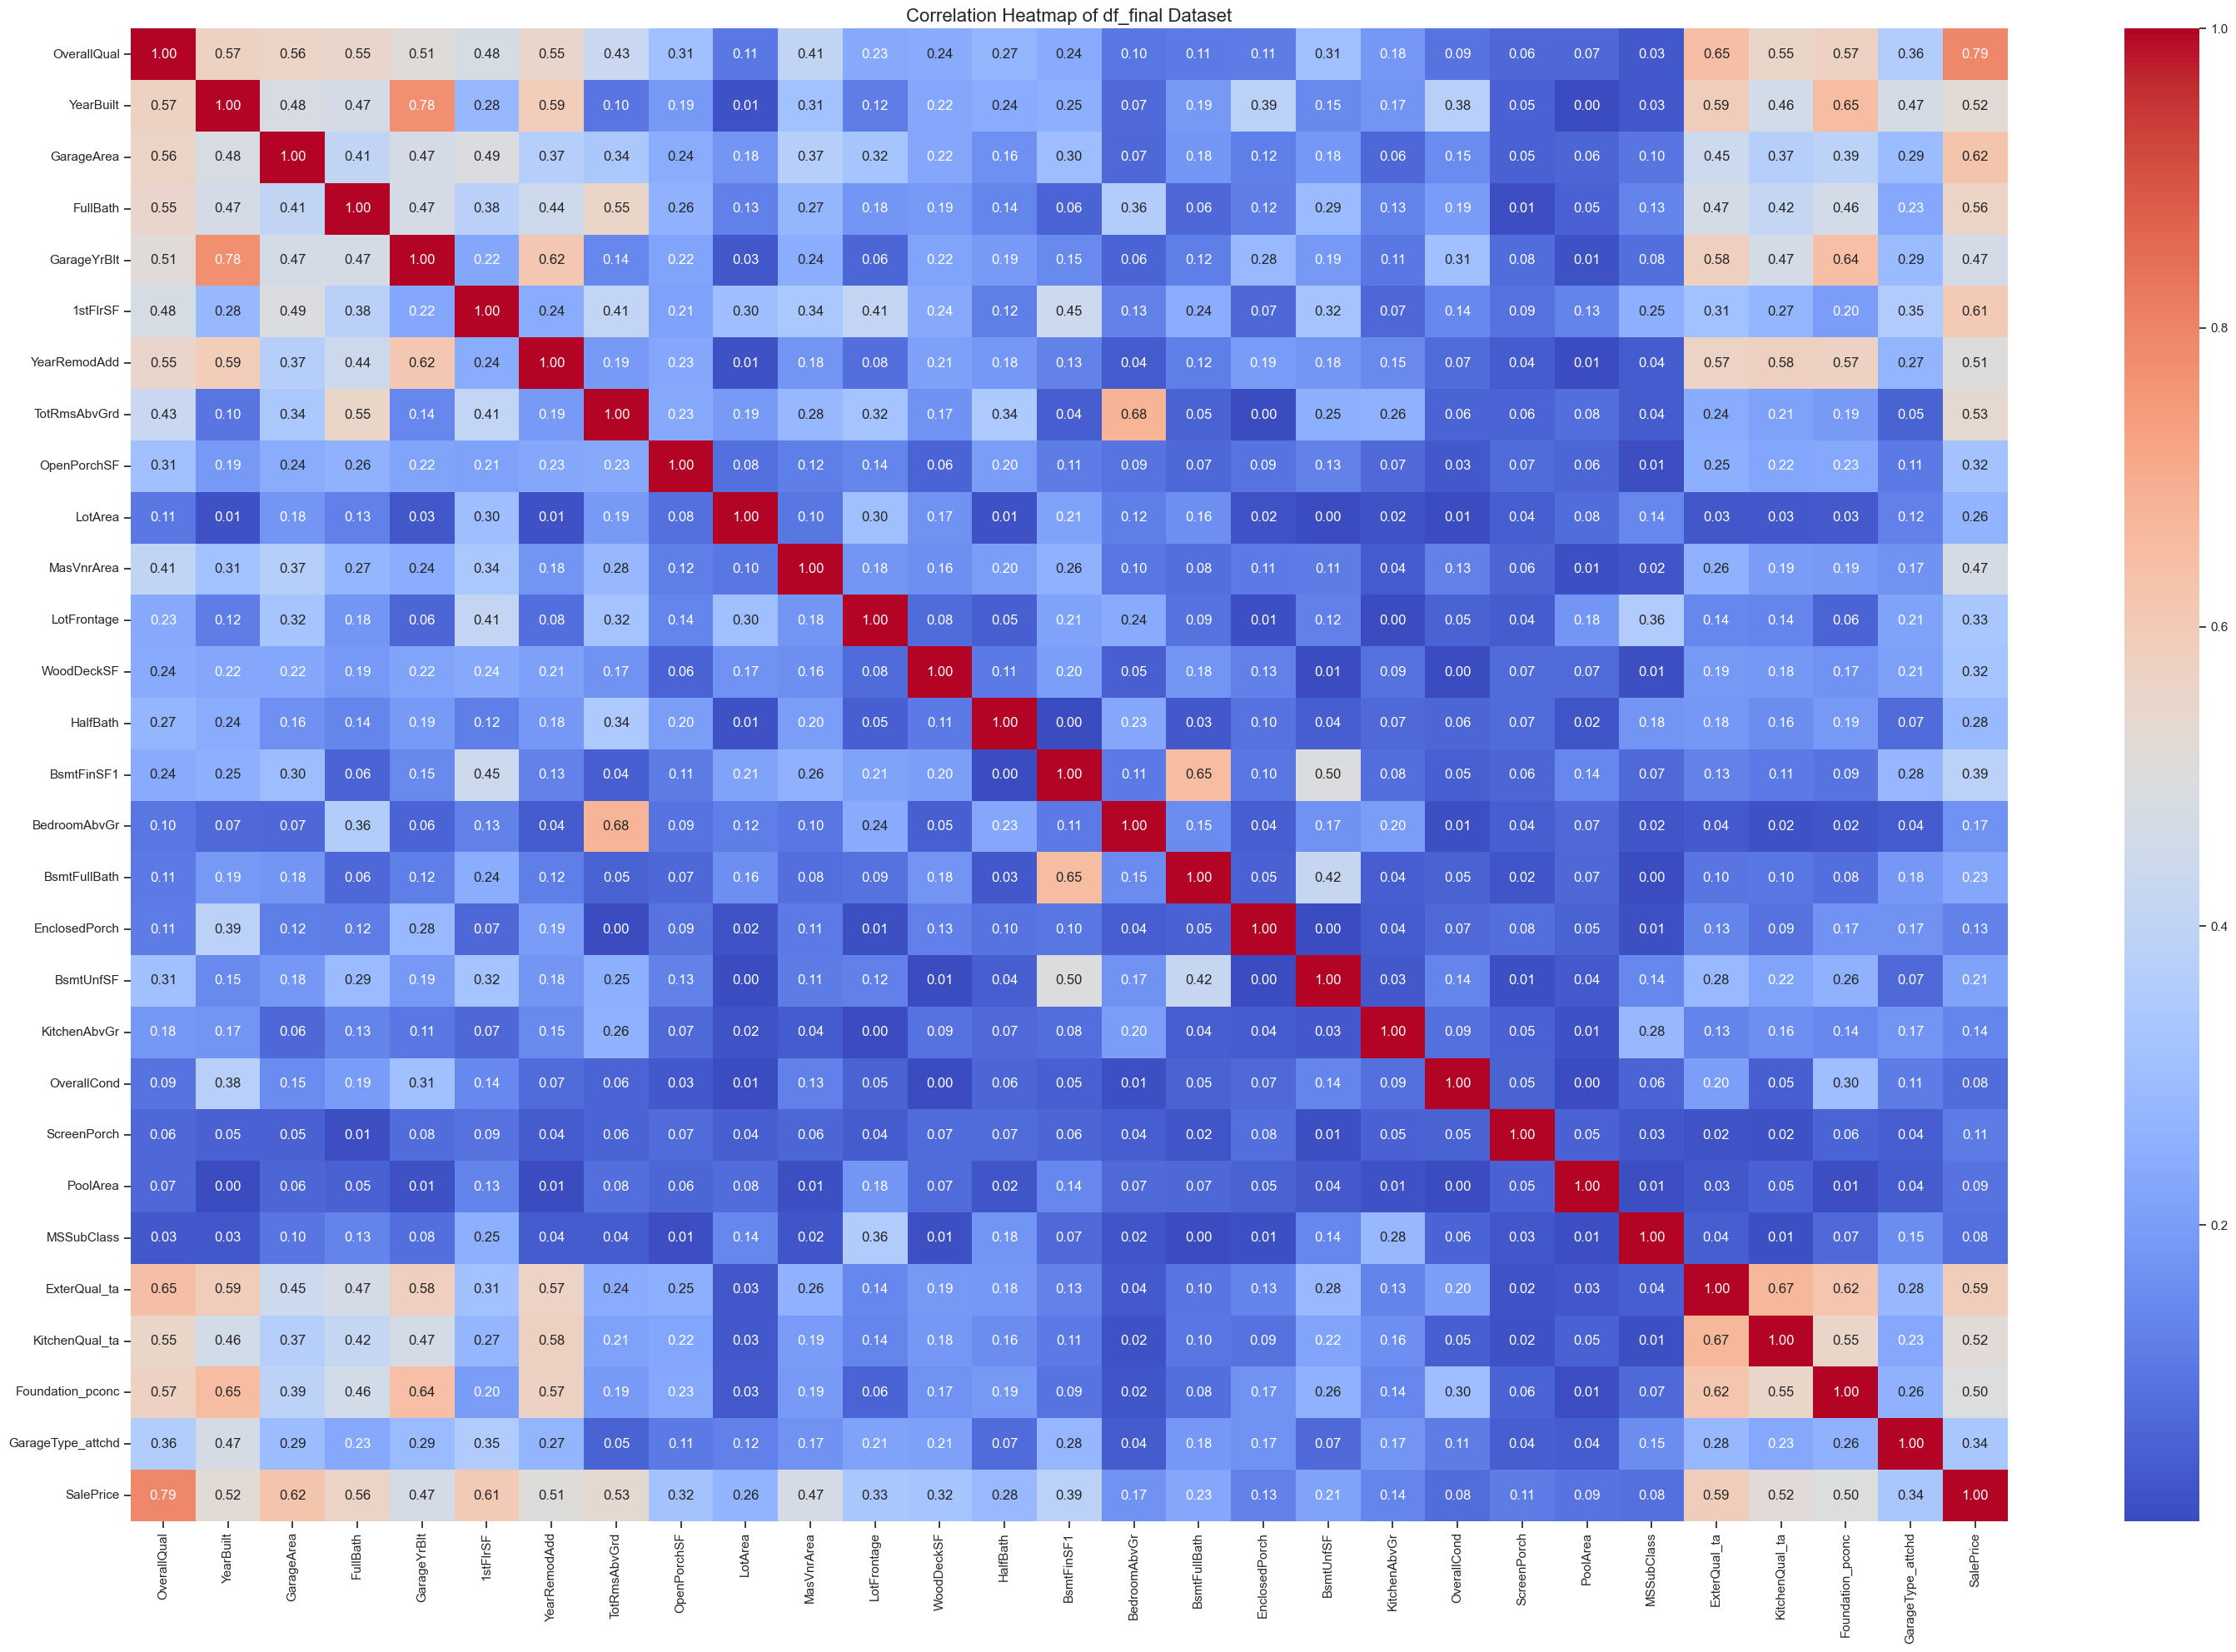

In [43]:
corr_mat = df_final.corr(numeric_only=True).abs()
plt.figure(figsize=(30, 20))

# Create the heatmap
sns.heatmap(corr_mat, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)

# Add title
plt.title('Correlation Heatmap of df_final Dataset', fontsize=16)

# Show the plot
plt.tight_layout()
plt.show()

#Draw the pair plots

In [ ]:
# Select only numerical columns
numeric_cols = df_final.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Create the pair plo
sns.set(style="ticks")
pair_plot = sns.pairplot(df_final[numeric_cols], diag_kind='kde')
# Add a title
pair_plot.figure.suptitle('Pair Plot of Numerical Variables in df_final Dataset', y=1.02)

#shutil.make_archive('pair_plots', 'zip')
#print("All pair plots have been zipped into 'pair_plots.zip'")


# Show the plot
plt.show()




KeyboardInterrupt: 

Error in callback <function flush_figures at 0x0000026284392D40> (for post_execute), with arguments args (),kwargs {}:


KeyboardInterrupt: 

from IPython.display import HTML
import base64

def create_download_link(df, filename="data.csv"):
    """
    Generates a link to download a CSV file from a pandas DataFrame.
    
    Args:
        df (pandas.DataFrame): The DataFrame to convert.
        filename (str): The name for the downloaded file.
    
    Returns:
        IPython.display.HTML: An HTML object containing the download link.
    """
    # Convert the DataFrame to a CSV string
    csv_output = df.to_csv(index=False)
    
    # Encode the CSV string to base64
    b64 = base64.b64encode(csv_output.encode()).decode()
    
    # Create the HTML link tag with the base64 data
    href = f'<a href="data:text/csv;base64,{b64}" download="{filename}">Download CSV file</a>'
    
    return HTML(href)




#Generate and display the download link
print("\nClick the link below to download the file:")
create_download_link(df_clean, filename="my_data_download.csv")

In [49]:
df_final.SalePrice.dtype

dtype('float64')

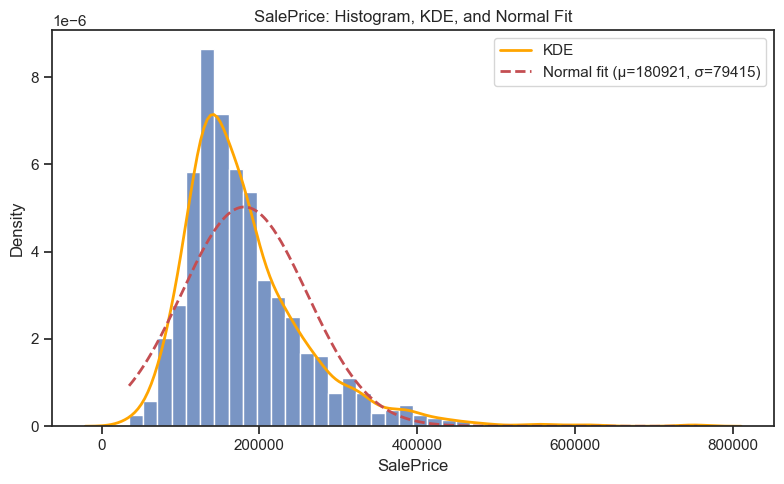

In [54]:

from scipy.stats import norm

s = pd.to_numeric(df_final['SalePrice'], errors='coerce').dropna()

# Fit normal parameters from data
mu, sigma = norm.fit(s)

plt.figure(figsize=(8,5))
sns.histplot(s, bins=40, stat='density', color='#4C72B0', edgecolor='white')

# KDE (optional)
sns.kdeplot(s, color='orange', linewidth=2, label='KDE')

# Fitted Normal curve
x = np.linspace(s.min(), s.max(), 300)
plt.plot(x, norm.pdf(x, mu, sigma), 'r--', linewidth=2, label=f'Normal fit (μ={mu:.0f}, σ={sigma:.0f})')

plt.title('SalePrice: Histogram, KDE, and Normal Fit')
plt.xlabel('SalePrice')
plt.ylabel('Density')
plt.legend()
plt.tight_layout()
plt.show()


In [57]:
#The distribution is right‑skewed (a long tail to the right)
#Most houses are clustered between $120,000–$250,000
#A few expensive homes pull the distribution to the right
#The KDE curve (smooth yellow line) also confirms skewness
#The target variable is NOT normally distributed.

#So do a log transformation
df_final['SalePrice'] = np.log1p(df_final['SalePrice'])

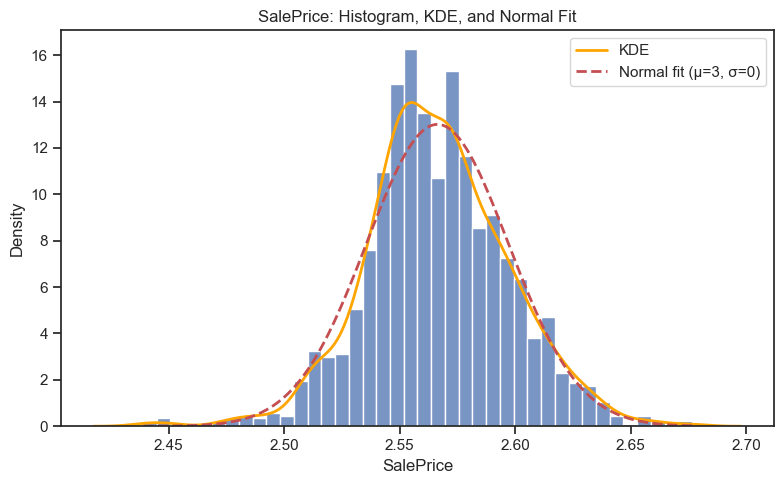

In [58]:

from scipy.stats import norm

s = pd.to_numeric(df_final['SalePrice'], errors='coerce').dropna()

# Fit normal parameters from data
mu, sigma = norm.fit(s)

plt.figure(figsize=(8,5))
sns.histplot(s, bins=40, stat='density', color='#4C72B0', edgecolor='white')

# KDE (optional)
sns.kdeplot(s, color='orange', linewidth=2, label='KDE')

# Fitted Normal curve
x = np.linspace(s.min(), s.max(), 300)
plt.plot(x, norm.pdf(x, mu, sigma), 'r--', linewidth=2, label=f'Normal fit (μ={mu:.0f}, σ={sigma:.0f})')

plt.title('SalePrice: Histogram, KDE, and Normal Fit')
plt.xlabel('SalePrice')
plt.ylabel('Density')
plt.legend()
plt.tight_layout()
plt.show()


## Lets us differentiate between training and test data and do sclaing

Let's start building the model. The first step to model building is the usual test-train split. So let's perform that

In [61]:
##split into train and test
from sklearn.model_selection import train_test_split
np.random.seed(0)
df_train, df_test = train_test_split(df_final, train_size=0.7, test_size = 0.3, random_state=100)

In [60]:
from sklearn.preprocessing import MinMaxScaler 

# Select numeric columns
num_cols = df_final.select_dtypes(include=[np.number]).columns

# Initialize scaler (default range [0, 1])
mm = MinMaxScaler()

# Fit-transform numeric columns and keep as DataFrame
df_scaled = df_final.copy()
df_scaled[num_cols] = mm.fit_transform(df_final[num_cols])

# Optional: check result
df_scaled[num_cols].describe().T.head()


,count,mean,std,min,25%,50%,75%,max
OverallQual,1460.0,0.566591,0.153666,0.0,0.444444,0.555556,0.666667,1.0
YearBuilt,1460.0,0.719332,0.218862,0.0,0.594203,0.731884,0.927536,1.0
GarageArea,1460.0,0.333554,0.150779,0.0,0.235896,0.338505,0.406206,1.0
FullBath,1460.0,0.521689,0.183639,0.0,0.333333,0.666667,0.666667,1.0
GarageYrBlt,1460.0,0.714446,0.218155,0.0,0.563636,0.727273,0.918182,1.0


#If later you need the original numeric values back:
orig_numeric = mm.inverse_transform(df_scaled[num_cols])

In [68]:
##Storing target variable to y_train and y_test respectively
y_train = df_train['SalePrice']
y_test = df_test['SalePrice']
##Storing all feature variables to X_train and X_test
X_train = df_train.drop('SalePrice',axis=1)
X_test = df_test.drop('SalePrice',axis=1)
print('y_train\n',y_train.head(5))
print('y_test\n',y_test.head(5))
print('X_train\n',X_train.head(5))
print('X_test\n',X_test.head(5))

y_train
 210     2.525147
318     2.600349
239     2.536483
986     2.539232
1416    2.542851
Name: SalePrice, dtype: float64
y_test
 1436    2.541556
57      2.579339
780     2.570950
382     2.585611
1170    2.568744
Name: SalePrice, dtype: float64
X_train
       OverallQual  YearBuilt  GarageArea  FullBath  GarageYrBlt  1stFlrSF  \
210           5.0     1925.0         0.0       1.0       1980.0     864.0   
318           7.0     1993.0       656.0       2.0       1993.0    1372.0   
239           6.0     1945.0       220.0       1.0       1949.0     798.0   
986           6.0     1910.0       255.0       1.0       1950.0    1001.0   
1416          4.0     1885.0       560.0       2.0       1971.0    1246.0   

      YearRemodAdd  TotRmsAbvGrd  OpenPorchSF  LotArea  MasVnrArea  \
210         1950.0           5.0          0.0   5604.0         0.0   
318         1993.0           9.0         60.0   9900.0       256.0   
239         1950.0           7.0        140.0   8741.0         0.0 

In [91]:
# Importing RFE and LinearRegression
# Since there are more variables to be analysed, we will used the automated feature elimination process (RFE)

from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

# Running RFE 
#  we will run RFE to select some that have high predictive power
lm = LinearRegression()
lm.fit(X_train, y_train)
 # running RFE for all variables
rfe = RFE(lm)            
rfe = rfe.fit(X_train, y_train)
# Check the ranks
list(zip(X_train.columns,rfe.support_,rfe.ranking_))


[('OverallQual', np.True_, np.int64(1)),
 ('YearBuilt', np.True_, np.int64(1)),
 ('GarageArea', np.False_, np.int64(4)),
 ('FullBath', np.True_, np.int64(1)),
 ('GarageYrBlt', np.True_, np.int64(1)),
 ('1stFlrSF', np.False_, np.int64(8)),
 ('YearRemodAdd', np.False_, np.int64(2)),
 ('TotRmsAbvGrd', np.True_, np.int64(1)),
 ('OpenPorchSF', np.False_, np.int64(12)),
 ('LotArea', np.False_, np.int64(14)),
 ('MasVnrArea', np.False_, np.int64(15)),
 ('LotFrontage', np.False_, np.int64(10)),
 ('WoodDeckSF', np.False_, np.int64(6)),
 ('HalfBath', np.True_, np.int64(1)),
 ('BsmtFinSF1', np.False_, np.int64(11)),
 ('BedroomAbvGr', np.False_, np.int64(5)),
 ('BsmtFullBath', np.True_, np.int64(1)),
 ('EnclosedPorch', np.False_, np.int64(9)),
 ('BsmtUnfSF', np.False_, np.int64(13)),
 ('KitchenAbvGr', np.True_, np.int64(1)),
 ('OverallCond', np.True_, np.int64(1)),
 ('ScreenPorch', np.False_, np.int64(3)),
 ('PoolArea', np.False_, np.int64(7)),
 ('MSSubClass', np.True_, np.int64(1)),
 ('ExterQual_t

In [95]:
col = X_train.columns[rfe.support_]
X_train.columns[~rfe.support_]
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]
X_train_rfe = pd.DataFrame(X_train[col])
print(X_train_rfe.shape)
X_train_rfe.head()

(1168, 14)


,OverallQual,YearBuilt,FullBath,GarageYrBlt,TotRmsAbvGrd,HalfBath,BsmtFullBath,KitchenAbvGr,OverallCond,MSSubClass,ExterQual_ta,KitchenQual_ta,Foundation_pconc,GarageType_attchd
254,5.0,1957.0,1.0,1957.0,5.0,0.0,1.0,1.0,6.0,20.0,True,True,False,True
1066,6.0,1993.0,2.0,1993.0,7.0,1.0,0.0,1.0,7.0,60.0,False,True,True,True
638,5.0,1910.0,1.0,1980.0,4.0,0.0,0.0,1.0,7.0,30.0,True,True,False,False
799,5.0,1937.0,1.0,1939.0,7.0,1.0,1.0,1.0,7.0,50.0,True,False,False,False
380,5.0,1924.0,2.0,1924.0,6.0,0.0,0.0,1.0,6.0,50.0,True,False,False,False


In [ ]:
# predict
y_train_pred = lm.predict(X_train)
metrics.r2_score(y_true=y_train, y_pred=y_train_pred)

0.8523079259088231

In [97]:
y_test_pred = lm.predict(X_test)
metrics.r2_score(y_true=y_test, y_pred=y_test_pred)

0.8584270151647195

In [99]:
residuals = y_test - y_test_pred
residuals

892    -0.000312
1105    0.004251
413     0.004132
522     0.006304
1036    0.001103
          ...   
479    -0.022954
1361    0.008901
802    -0.008118
651     0.002461
722     0.011453
Name: SalePrice, Length: 292, dtype: float64

Our training R² and test R² are almost the same, that is an excellent sign for the model. Here’s what it means in simple terms:


1. model is not overfitting
Overfitting happens when:

Train R² is very high (e.g., 0.95)
Test R² is much lower (e.g., 0.60)

But in this case:
Train R² ≈ Test R²
This means the model is not just memorizing the training data — it has learned the underlying patterns that generalize well to unseen data.

2. Your model is not underfitting either
Underfitting happens when both R² values are low (e.g., 0.40 and 0.35).
That would mean the model is too simple.
But your R² is around 0.85, which is high — so you're not underfitting.

3. the model generalizes well
The entire point of machine learning is that the model should work well on new data it hasn’t seen.
Since:

Train performance ≈ Test performance

your model is likely to perform reliably in real-world scenarios.

Lasso and Ridge Regression

Let's now try predicting house prices and perform lasso and ridge regression.

In [100]:
# Applying Lasso

# list of alphas to tune
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}
lasso = Lasso()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


,estimator,Lasso()
,param_grid,"{'alpha': [0.0001, 0.001, ...]}"
,scoring,'neg_mean_absolute_error'
,n_jobs,None
,refit,True
,cv,5
,verbose,1
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,True
,alpha,0.0001


In [101]:
# cv_results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results = cv_results[cv_results['param_alpha']<=1]
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.006674,0.002382,0.002842,0.000912,0.0001,{'alpha': 0.0001},-0.007940,-0.008350,-0.009480,-0.007612,-0.007697,-0.008216,0.000682,1,-0.008115,-0.007762,-0.007016,-0.008115,-0.008043,-0.007810,0.000418
1,0.004699,0.001375,0.002107,0.000782,0.0010,{'alpha': 0.001},-0.008317,-0.009055,-0.010367,-0.008068,-0.008124,-0.008786,0.000866,2,-0.008715,-0.008320,-0.007669,-0.008650,-0.008632,-0.008397,0.000389
2,0.003269,0.000529,0.001403,0.000193,0.0100,{'alpha': 0.01},-0.011170,-0.012246,-0.014173,-0.011066,-0.011412,-0.012013,0.001157,3,-0.012088,-0.011640,-0.010785,-0.011951,-0.011900,-0.011673,0.000467
3,0.003414,0.000618,0.001338,0.000138,0.0500,{'alpha': 0.05},-0.011539,-0.012538,-0.014681,-0.011463,-0.011319,-0.012308,0.001262,4,-0.012323,-0.011987,-0.011340,-0.012257,-0.012266,-0.012035,0.000366
4,0.002145,0.000377,0.000890,0.000151,0.1000,{'alpha': 0.1},-0.012108,-0.012953,-0.015411,-0.012255,-0.011784,-0.012902,0.001311,5,-0.012843,-0.012600,-0.012117,-0.012863,-0.012875,-0.012659,0.000290


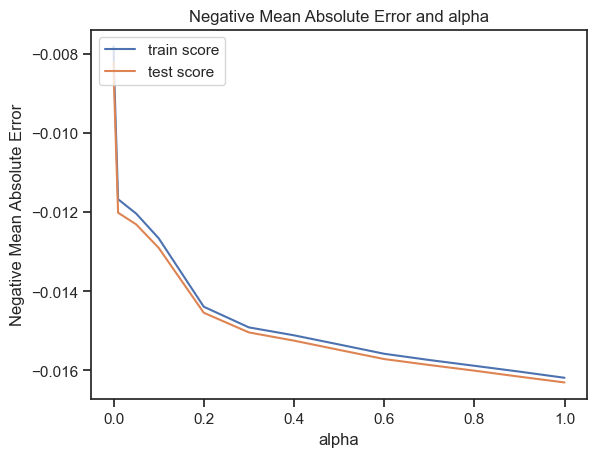

In [102]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

The selected best alpha = 0.0001, This is very small regularization.
The features likely do not suffer from strong multicollinearity
The important predictors have non-zero influence
Only slight feature shrinkage was needed


analysis of the graph also in consistent with the above results
Although the graph doesn't explicitly highlight the chosen alpha:

The smooth decreasing trend suggests alphas around 0.1–1.0 give the best performance

But this plot indicates:

No instability in training
Regularization helps improve model performancem

In [ ]:
# At alpha = 0.0001,get he lasso coefficients
alpha = 0.0001
lasso = Lasso(alpha=alpha)

lasso.fit(X_train, y_train)
lasso.coef_

array([ 7.20572064e-03,  1.83251661e-04,  2.16561740e-05,  4.28311134e-03,
       -9.82440065e-05,  1.04176154e-05,  8.96624111e-05,  2.82069709e-03,
       -5.78981935e-07,  2.06550666e-07, -1.78561886e-08, -3.00185132e-05,
        1.23765036e-05,  5.51290316e-03,  2.89563478e-06,  7.85148630e-04,
        3.76299553e-03,  1.30399126e-05, -5.94771359e-07, -3.69688220e-03,
        3.46026759e-03,  3.48148246e-05, -2.42600783e-05, -3.52503760e-05,
       -1.62400954e-03, -1.43224328e-03,  4.25854348e-03,  2.08453753e-03])

In [108]:
# lasso model parameters
model_parameters = list(lasso.coef_ )
model_parameters.insert(0, lasso.intercept_)
model_parameters = [round(x, 3) for x in model_parameters]
cols = X.columns
cols = cols.insert(0, "constant")
list(zip(cols, model_parameters))

[('constant', np.float64(2.106)),
 ('OverallQual', np.float64(0.007)),
 ('YearBuilt', np.float64(0.0)),
 ('GarageArea', np.float64(0.0)),
 ('FullBath', np.float64(0.004)),
 ('GarageYrBlt', np.float64(-0.0)),
 ('1stFlrSF', np.float64(0.0)),
 ('YearRemodAdd', np.float64(0.0)),
 ('TotRmsAbvGrd', np.float64(0.003)),
 ('OpenPorchSF', np.float64(-0.0)),
 ('LotArea', np.float64(0.0)),
 ('MasVnrArea', np.float64(-0.0)),
 ('LotFrontage', np.float64(-0.0)),
 ('WoodDeckSF', np.float64(0.0)),
 ('HalfBath', np.float64(0.006)),
 ('BsmtFinSF1', np.float64(0.0)),
 ('BedroomAbvGr', np.float64(0.001)),
 ('BsmtFullBath', np.float64(0.004)),
 ('EnclosedPorch', np.float64(0.0)),
 ('BsmtUnfSF', np.float64(-0.0)),
 ('KitchenAbvGr', np.float64(-0.004)),
 ('OverallCond', np.float64(0.003)),
 ('ScreenPorch', np.float64(0.0)),
 ('PoolArea', np.float64(-0.0)),
 ('MSSubClass', np.float64(-0.0)),
 ('ExterQual_ta', np.float64(-0.002)),
 ('KitchenQual_ta', np.float64(-0.001)),
 ('Foundation_pconc', np.float64(0.004))

In [110]:
# lasso regression
lm = Lasso(alpha=0.0001)
lm.fit(X_train, y_train)

# prediction on the test set(Using R2)
y_train_pred = lm.predict(X_train)
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred))
y_test_pred = lm.predict(X_test)
print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred))
print('RMSE :', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

0.8514891773554903
0.8590441685650723
RMSE : 0.012471796524374065


In [113]:
#### The R2 values for Train and Test matches well, indicating an optimum model
## Creating a dataframe for the coefficients obtained from Lasso
mod = list(zip(cols, model_parameters))
para = pd.DataFrame(mod)
para.columns = ['Variable', 'Coeff']
# sort the coefficients in ascending order
para = para.sort_values((['Coeff']), axis = 0, ascending = False)

para.head(30)

,Variable,Coeff
0,constant,2.106
1,OverallQual,0.007
14,HalfBath,0.006
17,BsmtFullBath,0.004
4,FullBath,0.004
27,Foundation_pconc,0.004
21,OverallCond,0.003
8,TotRmsAbvGrd,0.003
28,GarageType_attchd,0.002
16,BedroomAbvGr,0.001


In [115]:
# Chose variables whose coefficients are non-zero
pred = pd.DataFrame(para[(para['Coeff'] != 0)])
print(pred.shape)
pred

(13, 2)


,Variable,Coeff
0,constant,2.106
1,OverallQual,0.007
14,HalfBath,0.006
17,BsmtFullBath,0.004
4,FullBath,0.004
27,Foundation_pconc,0.004
21,OverallCond,0.003
8,TotRmsAbvGrd,0.003
28,GarageType_attchd,0.002
16,BedroomAbvGr,0.001


Ridge Regression

In [121]:
# list of alphas to tune
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}


ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


,estimator,Ridge()
,param_grid,"{'alpha': [0.0001, 0.001, ...]}"
,scoring,'neg_mean_absolute_error'
,n_jobs,None
,refit,True
,cv,5
,verbose,1
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,True
,alpha,20


In [123]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results = cv_results[cv_results['param_alpha']<=5]
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.003092,0.000524,0.001644,0.000144,0.0001,{'alpha': 0.0001},-0.008013,-0.008302,-0.009476,-0.00762,-0.007735,-0.008229,0.000667,25,-0.008119,-0.007791,-0.006991,-0.008118,-0.008076,-0.007819,0.000432
1,0.002421,0.000455,0.001318,0.000183,0.0010,{'alpha': 0.001},-0.008013,-0.008302,-0.009476,-0.00762,-0.007735,-0.008229,0.000667,24,-0.008119,-0.007791,-0.006991,-0.008118,-0.008076,-0.007819,0.000432
2,0.002647,0.001029,0.001365,0.000410,0.0100,{'alpha': 0.01},-0.008013,-0.008302,-0.009476,-0.00762,-0.007735,-0.008229,0.000667,23,-0.008119,-0.007791,-0.006991,-0.008118,-0.008076,-0.007819,0.000432
3,0.001729,0.000304,0.000879,0.000182,0.0500,{'alpha': 0.05},-0.008013,-0.008302,-0.009476,-0.00762,-0.007735,-0.008229,0.000667,22,-0.008119,-0.007791,-0.006991,-0.008118,-0.008076,-0.007819,0.000432
4,0.001846,0.000469,0.000855,0.000130,0.1000,{'alpha': 0.1},-0.008013,-0.008302,-0.009475,-0.00762,-0.007734,-0.008229,0.000667,21,-0.008119,-0.007791,-0.006991,-0.008118,-0.008076,-0.007819,0.000432


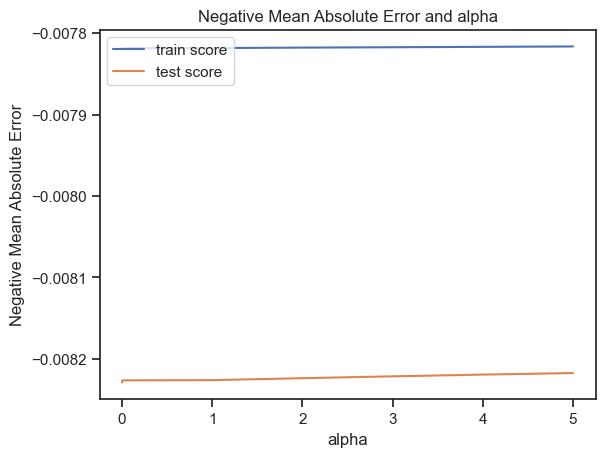

In [124]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

Ridge regularization has almost NO effect on your model
The fact that the error does not change means:

The model is not very sensitive to multicollinearity
Coefficients do not blow up
The feature magnitudes are already well-behaved
Regularization (alpha) does not improve things

In simple words:

Dataset does not benefit much from Ridge’s L2 penalty.
Adding more or less regularization doesn’t change the performance.

Train and test curves overlap → great generalization
Since both lines move together:

No overfitting
No underfitting
Model performance is stable and consistent